1. Carga y Exploración de Datos

In [18]:
import pandas as pd

# Cargar los datos del Grupo 1
grupo1_df = pd.read_csv('Grupo1.csv')

# Cargar los datos del Grupo 2
grupo2_df = pd.read_csv('Grupo2.csv')

# Mostrar las primeras filas de cada DataFrame
print("Primeras filas del Grupo 1:")
display(grupo1_df.head())

print("Primeras filas del Grupo 2:")
display(grupo2_df.head())


Primeras filas del Grupo 1:


,created_at,entry_id,field1,field2,field3
0,2024-06-08 13:07:53 -0400,223,21.5,50.3,192
1,2024-06-08 13:08:09 -0400,224,21.3,50.5,187
2,2024-06-08 13:08:25 -0400,225,21.2,50.9,186
3,2024-06-08 13:08:42 -0400,226,21.1,51.5,183
4,2024-06-08 13:08:57 -0400,227,21.2,52.0,186


Primeras filas del Grupo 2:


,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,latitude,longitude,elevation,status
0,2024-03-14T18:47:56-05:00,1,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
1,2024-03-14T18:50:15-05:00,2,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
2,2024-03-14T18:50:32-05:00,3,118.2,0.021,0.0,0.012,59.9,0.0,2.4822,NaN,NaN,NaN,NaN
3,2024-03-14T18:50:49-05:00,4,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
4,2024-03-14T18:51:05-05:00,5,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN


2. Preprocesamiento de Datos
Convertiremos las columnas de fechas a tipo datetime y eliminaremos las filas con valores faltantes.

In [19]:
# Convertir created_at a datetime
grupo1_df['created_at'] = pd.to_datetime(grupo1_df['created_at'])
grupo2_df['created_at'] = pd.to_datetime(grupo2_df['created_at'])

# Eliminar columnas irrelevantes del Grupo 2
grupo2_df = grupo2_df.drop(columns=['latitude', 'longitude', 'elevation', 'status'])

# Manejar valores faltantes eliminando filas con valores faltantes
grupo1_df = grupo1_df.dropna()
grupo2_df = grupo2_df.dropna()

# Convertir ambas columnas created_at a la misma zona horaria (UTC)
grupo1_df['created_at'] = grupo1_df['created_at'].dt.tz_convert('UTC')
grupo2_df['created_at'] = grupo2_df['created_at'].dt.tz_convert('UTC')

# Unir los dos grupos de datos en base a la columna 'created_at'
combined_df = pd.merge_asof(grupo1_df.sort_values('created_at'), grupo2_df.sort_values('created_at'), on='created_at')

# Renombrar las columnas para mayor claridad
combined_df.columns = ['created_at', 'entry_id_x', 'temperature', 'humidity', 'radiation', 'entry_id_y', 'voltaje', 'corriente', 'potencia', 'energia', 'frecuencia', 'pf', 'q']

# Verificar las columnas del DataFrame combinado
print("Columnas del DataFrame combinado:")
print(combined_df.columns)


Columnas del DataFrame combinado:
Index(['created_at', 'entry_id_x', 'temperature', 'humidity', 'radiation',
       'entry_id_y', 'voltaje', 'corriente', 'potencia', 'energia',
       'frecuencia', 'pf', 'q'],
      dtype='object')


3. Segmentación de Datos por Altura
Dividimos los datos en cuatro grupos según las alturas especificadas:

##Primeros 25 datos: 3 m de altura


##Siguientes 25 datos: 1.8 m de altura


##Siguientes 25 datos: 30 cm por encima del panel

##Últimos 25 datos: Altura del panel

3. Filtrado de Datos


In [49]:
# Filtrar los datos para eliminar Q por debajo de 2.86 para la altura 'Panel'
combined_df_cleaned = combined_df[~((combined_df['q'] < 2.86) & (combined_df['temperature'] >= 29))]

# Filtrar los datos para eliminar PF superior a 0.6275 para la altura 'Panel'
combined_df_cleaned = combined_df_cleaned[~((combined_df_cleaned['pf'] > 0.6275) & (combined_df_cleaned['humidity'] >= 80))]

# Verificar las primeras filas después de la limpieza
print("Datos después de la limpieza:")
display(combined_df_cleaned.head())


Datos después de la limpieza:


,created_at,entry_id_x,temperature,humidity,radiation,entry_id_y,voltaje,corriente,potencia,energia,frecuencia,pf,q,time_in_minutes,time_in_seconds
0,2024-06-08 17:07:53+00:00,223,21.5,50.3,192,1016,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,17:07,0.0
1,2024-06-08 17:08:09+00:00,224,21.3,50.5,187,1017,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,17:08,16.0
2,2024-06-08 17:08:25+00:00,225,21.2,50.9,186,1018,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,17:08,32.0
3,2024-06-08 17:08:42+00:00,226,21.1,51.5,183,1019,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,17:08,49.0
4,2024-06-08 17:08:57+00:00,227,21.2,52.0,186,1020,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,17:08,64.0


4. Segmentación de Datos por Altura

In [50]:
# Definir los intervalos de altura con el orden correcto
intervals_corrected = {
    '3m': (0, 25),
    '1.8m': (25, 50),
    '30cm_above': (50, 75),
    'Panel': (75, 100)
}

# Crear un diccionario para almacenar los datos segmentados
height_data_corrected = {}

# Segmentar los datos con el orden corregido
for key, (start, end) in intervals_corrected.items():
    height_data_corrected[key] = combined_df_cleaned.iloc[start:end]

# Mostrar las estadísticas descriptivas para cada altura con el orden corregido
for key, df in height_data_corrected.items():
    print(f"Estadísticas descriptivas para {key}:")
    display(df[['temperature', 'humidity']].describe())


Estadísticas descriptivas para 3m:


,temperature,humidity
count,25.000000,25.00000
mean,21.776000,50.40400
std,0.444672,0.90161
min,21.100000,49.20000
25%,21.300000,49.50000
50%,22.000000,50.30000
75%,22.200000,51.30000
max,22.400000,52.00000


Estadísticas descriptivas para 1.8m:


,temperature,humidity
count,25.000000,25.000000
mean,22.396000,50.824000
std,1.592556,2.954133
min,20.900000,43.300000
25%,21.200000,49.300000
50%,22.100000,51.100000
75%,22.500000,52.200000
max,26.400000,58.300000


Estadísticas descriptivas para 30cm_above:


,temperature,humidity
count,25.000000,25.000000
mean,26.700000,40.072000
std,0.496655,0.779166
min,26.000000,37.200000
25%,26.400000,39.900000
50%,26.600000,40.200000
75%,26.800000,40.500000
max,28.200000,41.400000


Estadísticas descriptivas para Panel:


,temperature,humidity
count,10.000000,10.000000
mean,31.220000,32.230000
std,2.695593,4.202129
min,27.100000,27.700000
25%,29.500000,28.375000
50%,31.450000,31.500000
75%,33.600000,34.725000
max,34.300000,38.700000


4. Visualización de Datos
Graficar la temperatura y la humedad para cada altura.

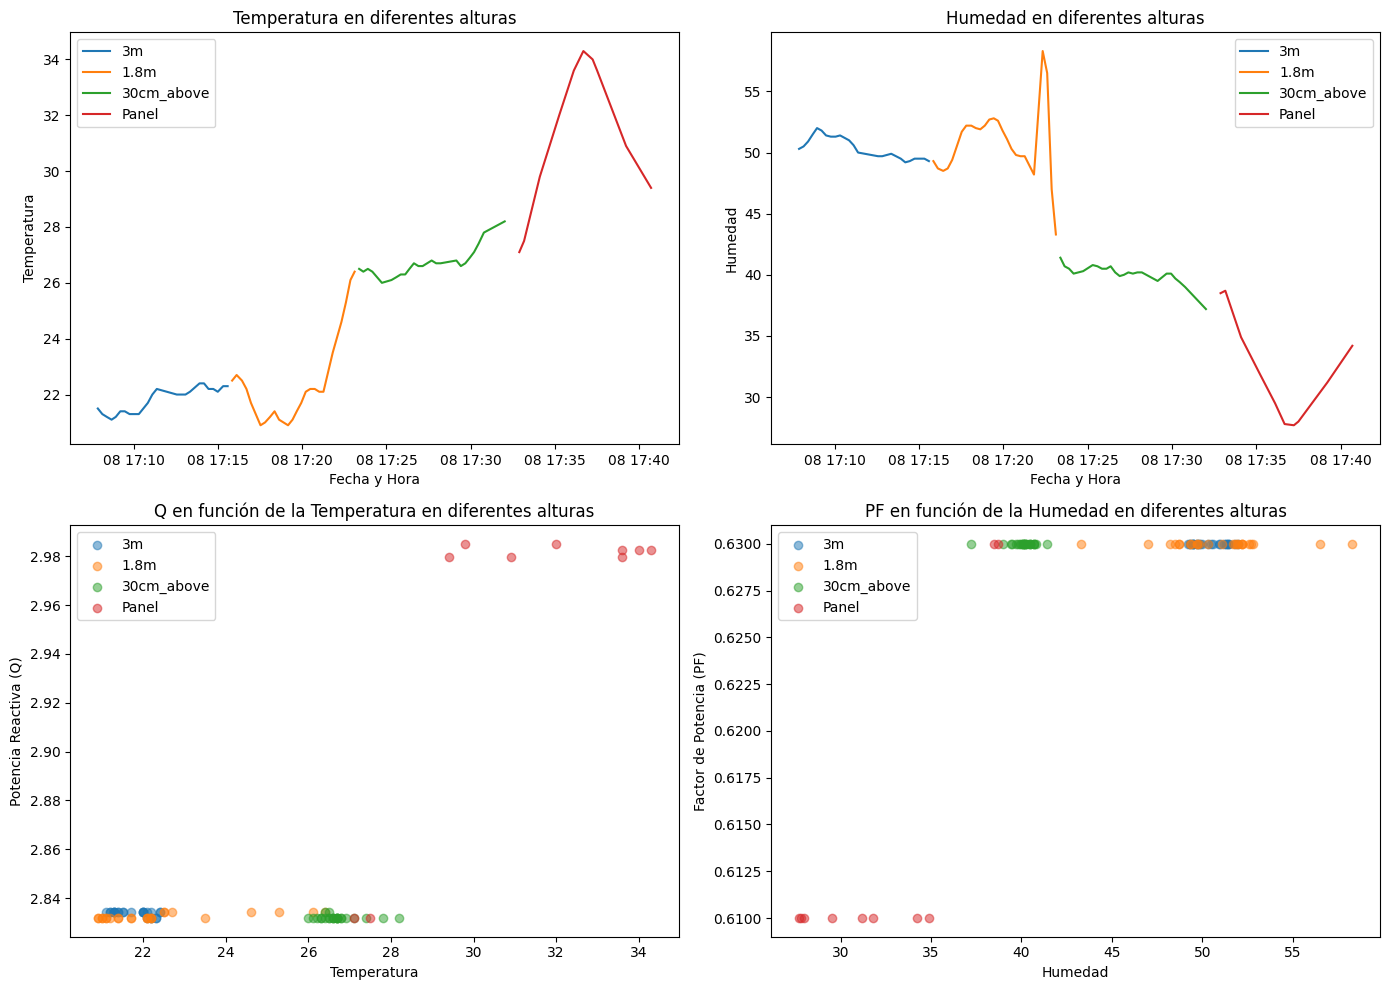

In [51]:
import matplotlib.pyplot as plt

# Crear una figura para las gráficas
plt.figure(figsize=(14, 10))

# Graficar la temperatura para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 1)
for key, df in height_data_corrected.items():
    plt.plot(df['created_at'], df['temperature'], label=key)
plt.xlabel('Fecha y Hora')
plt.ylabel('Temperatura')
plt.title('Temperatura en diferentes alturas')
plt.legend()

# Graficar la humedad para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 2)
for key, df in height_data_corrected.items():
    plt.plot(df['created_at'], df['humidity'], label=key)
plt.xlabel('Fecha y Hora')
plt.ylabel('Humedad')
plt.title('Humedad en diferentes alturas')
plt.legend()

# Graficar Q en función de la temperatura para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 3)
for key, df in height_data_corrected.items():
    plt.scatter(df['temperature'], df['q'], label=key, alpha=0.5)
plt.xlabel('Temperatura')
plt.ylabel('Potencia Reactiva (Q)')
plt.title('Q en función de la Temperatura en diferentes alturas')
plt.legend()

# Graficar PF en función de la humedad para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 4)
for key, df in height_data_corrected.items():
    plt.scatter(df['humidity'], df['pf'], label=key, alpha=0.5)
plt.xlabel('Humedad')
plt.ylabel('Factor de Potencia (PF)')
plt.title('PF en función de la Humedad en diferentes alturas')
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
import pandas as pd

# Cargar los datos del Grupo 1
grupo1_df = pd.read_csv('Grupo1.csv')

# Cargar los datos del Grupo 2
grupo2_df = pd.read_csv('Grupo2.csv')

# Mostrar las primeras filas de cada DataFrame
print("Primeras filas del Grupo 1:")
display(grupo1_df.head())

print("Primeras filas del Grupo 2:")
display(grupo2_df.head())


Primeras filas del Grupo 1:


,created_at,entry_id,field1,field2,field3
0,2024-06-08 13:07:53 -0400,223,21.5,50.3,192
1,2024-06-08 13:08:09 -0400,224,21.3,50.5,187
2,2024-06-08 13:08:25 -0400,225,21.2,50.9,186
3,2024-06-08 13:08:42 -0400,226,21.1,51.5,183
4,2024-06-08 13:08:57 -0400,227,21.2,52.0,186


Primeras filas del Grupo 2:


,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,latitude,longitude,elevation,status
0,2024-03-14T18:47:56-05:00,1,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
1,2024-03-14T18:50:15-05:00,2,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
2,2024-03-14T18:50:32-05:00,3,118.2,0.021,0.0,0.012,59.9,0.0,2.4822,NaN,NaN,NaN,NaN
3,2024-03-14T18:50:49-05:00,4,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN
4,2024-03-14T18:51:05-05:00,5,118.2,0.021,0.0,0.012,60.0,0.0,2.4822,NaN,NaN,NaN,NaN


In [54]:
# Convertir created_at a datetime
grupo1_df['created_at'] = pd.to_datetime(grupo1_df['created_at'])
grupo2_df['created_at'] = pd.to_datetime(grupo2_df['created_at'])

# Eliminar columnas irrelevantes del Grupo 2
grupo2_df = grupo2_df.drop(columns=['latitude', 'longitude', 'elevation', 'status'])

# Manejar valores faltantes eliminando filas con valores faltantes
grupo1_df = grupo1_df.dropna()
grupo2_df = grupo2_df.dropna()

# Convertir ambas columnas created_at a la misma zona horaria (UTC)
grupo1_df['created_at'] = grupo1_df['created_at'].dt.tz_convert('UTC')
grupo2_df['created_at'] = grupo2_df['created_at'].dt.tz_convert('UTC')

# Unir los dos grupos de datos en base a la columna 'created_at'
combined_df = pd.merge_asof(grupo1_df.sort_values('created_at'), grupo2_df.sort_values('created_at'), on='created_at')

# Renombrar las columnas para mayor claridad
combined_df.columns = ['created_at', 'entry_id_x', 'temperature', 'humidity', 'radiation', 'entry_id_y', 'voltaje', 'corriente', 'potencia', 'energia', 'frecuencia', 'pf', 'q']

# Convertir el tiempo a segundos desde el inicio
combined_df['time_in_seconds'] = (combined_df['created_at'] - combined_df['created_at'].min()).dt.total_seconds()

# Verificar las primeras filas
print("Datos con el tiempo en segundos:")
display(combined_df.head())


Datos con el tiempo en segundos:


,created_at,entry_id_x,temperature,humidity,radiation,entry_id_y,voltaje,corriente,potencia,energia,frecuencia,pf,q,time_in_seconds
0,2024-06-08 17:07:53+00:00,223,21.5,50.3,192,1016,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,0.0
1,2024-06-08 17:08:09+00:00,224,21.3,50.5,187,1017,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,16.0
2,2024-06-08 17:08:25+00:00,225,21.2,50.9,186,1018,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,32.0
3,2024-06-08 17:08:42+00:00,226,21.1,51.5,183,1019,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,49.0
4,2024-06-08 17:08:57+00:00,227,21.2,52.0,186,1020,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,64.0


In [55]:
# Filtrar los datos para eliminar Q por debajo de 2.86 para la altura 'Panel'
combined_df_cleaned = combined_df[~((combined_df['q'] < 2.86) & (combined_df['temperature'] >= 29))]

# Filtrar los datos para eliminar PF superior a 0.6275 para la altura 'Panel'
combined_df_cleaned = combined_df_cleaned[~((combined_df_cleaned['pf'] > 0.6275) & (combined_df_cleaned['humidity'] >= 80))]

# Verificar las primeras filas después de la limpieza
print("Datos después de la limpieza:")
display(combined_df_cleaned.head())


Datos después de la limpieza:


,created_at,entry_id_x,temperature,humidity,radiation,entry_id_y,voltaje,corriente,potencia,energia,frecuencia,pf,q,time_in_seconds
0,2024-06-08 17:07:53+00:00,223,21.5,50.3,192,1016,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,0.0
1,2024-06-08 17:08:09+00:00,224,21.3,50.5,187,1017,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,16.0
2,2024-06-08 17:08:25+00:00,225,21.2,50.9,186,1018,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,32.0
3,2024-06-08 17:08:42+00:00,226,21.1,51.5,183,1019,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,49.0
4,2024-06-08 17:08:57+00:00,227,21.2,52.0,186,1020,110.6,0.033,2.3,0.032,59.8,0.63,2.83442,64.0


In [56]:
# Definir los intervalos de altura con el orden correcto
intervals_corrected = {
    '3m': (0, 25),
    '1.8m': (25, 50),
    '30cm_above': (50, 75),
    'Panel': (75, 100)
}

# Crear un diccionario para almacenar los datos segmentados
height_data_corrected = {}

# Segmentar los datos con el orden corregido
for key, (start, end) in intervals_corrected.items():
    height_data_corrected[key] = combined_df_cleaned.iloc[start:end]

# Mostrar las estadísticas descriptivas para cada altura con el orden corregido
for key, df in height_data_corrected.items():
    print(f"Estadísticas descriptivas para {key}:")
    display(df[['temperature', 'humidity']].describe())


Estadísticas descriptivas para 3m:


,temperature,humidity
count,25.000000,25.00000
mean,21.776000,50.40400
std,0.444672,0.90161
min,21.100000,49.20000
25%,21.300000,49.50000
50%,22.000000,50.30000
75%,22.200000,51.30000
max,22.400000,52.00000


Estadísticas descriptivas para 1.8m:


,temperature,humidity
count,25.000000,25.000000
mean,22.396000,50.824000
std,1.592556,2.954133
min,20.900000,43.300000
25%,21.200000,49.300000
50%,22.100000,51.100000
75%,22.500000,52.200000
max,26.400000,58.300000


Estadísticas descriptivas para 30cm_above:


,temperature,humidity
count,25.000000,25.000000
mean,26.700000,40.072000
std,0.496655,0.779166
min,26.000000,37.200000
25%,26.400000,39.900000
50%,26.600000,40.200000
75%,26.800000,40.500000
max,28.200000,41.400000


Estadísticas descriptivas para Panel:


,temperature,humidity
count,10.000000,10.000000
mean,31.220000,32.230000
std,2.695593,4.202129
min,27.100000,27.700000
25%,29.500000,28.375000
50%,31.450000,31.500000
75%,33.600000,34.725000
max,34.300000,38.700000


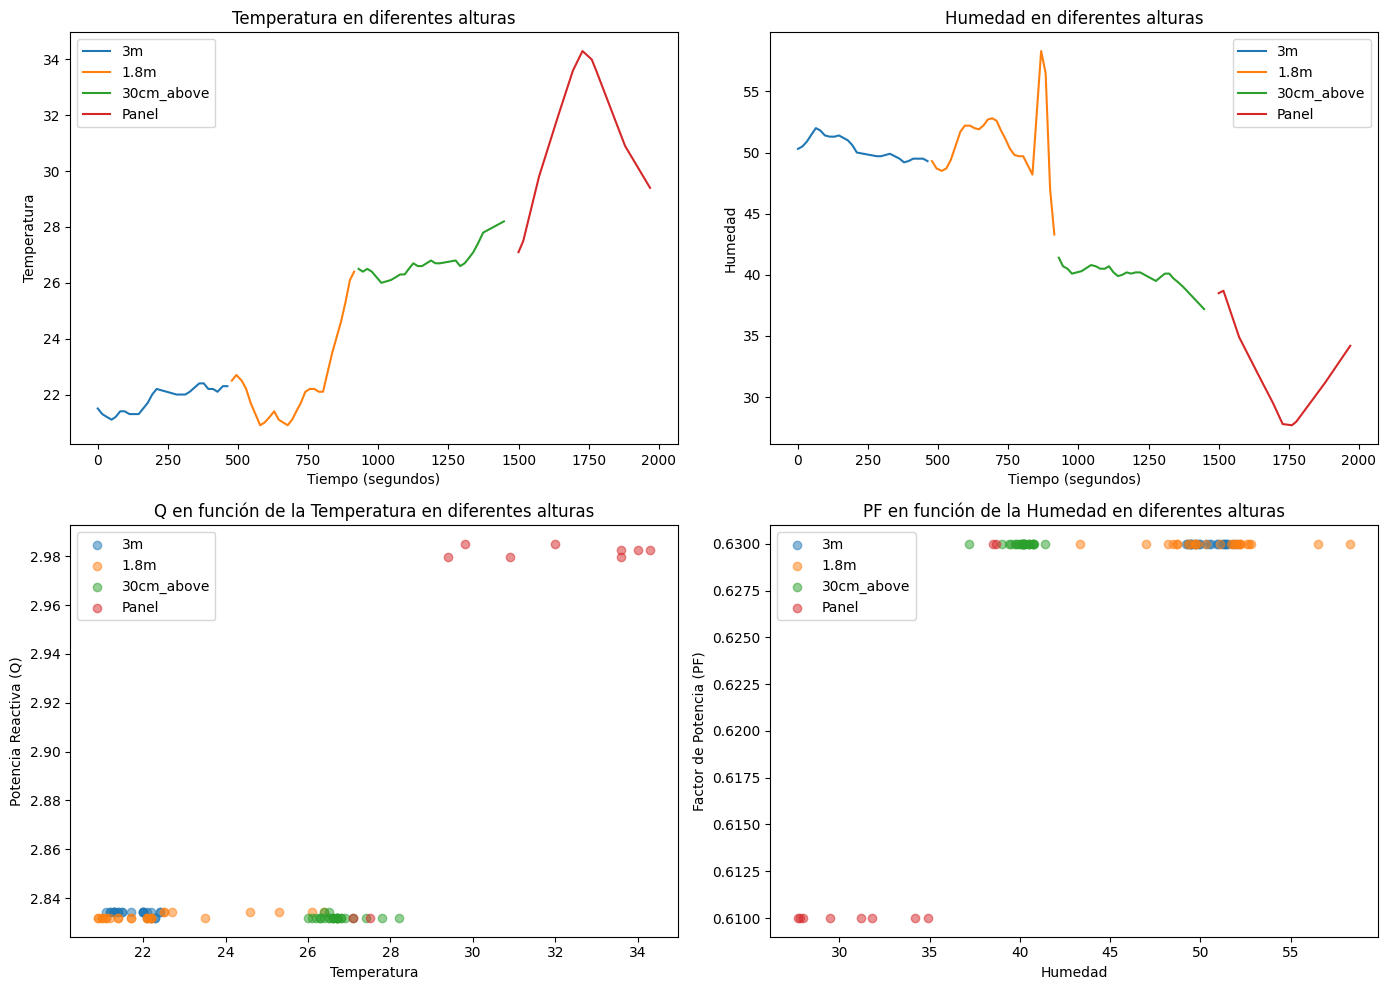

In [57]:
import matplotlib.pyplot as plt

# Crear una figura para las gráficas
plt.figure(figsize=(14, 10))

# Graficar la temperatura para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 1)
for key, df in height_data_corrected.items():
    plt.plot(df['time_in_seconds'], df['temperature'], label=key)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Temperatura')
plt.title('Temperatura en diferentes alturas')
plt.legend()

# Graficar la humedad para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 2)
for key, df in height_data_corrected.items():
    plt.plot(df['time_in_seconds'], df['humidity'], label=key)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Humedad')
plt.title('Humedad en diferentes alturas')
plt.legend()

# Graficar Q en función de la temperatura para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 3)
for key, df in height_data_corrected.items():
    plt.scatter(df['temperature'], df['q'], label=key, alpha=0.5)
plt.xlabel('Temperatura')
plt.ylabel('Potencia Reactiva (Q)')
plt.title('Q en función de la Temperatura en diferentes alturas')
plt.legend()

# Graficar PF en función de la humedad para cada altura con el orden correcto y datos limpios
plt.subplot(2, 2, 4)
for key, df in height_data_corrected.items():
    plt.scatter(df['humidity'], df['pf'], label=key, alpha=0.5)
plt.xlabel('Humedad')
plt.ylabel('Factor de Potencia (PF)')
plt.title('PF en función de la Humedad en diferentes alturas')
plt.legend()

plt.tight_layout()
plt.show()


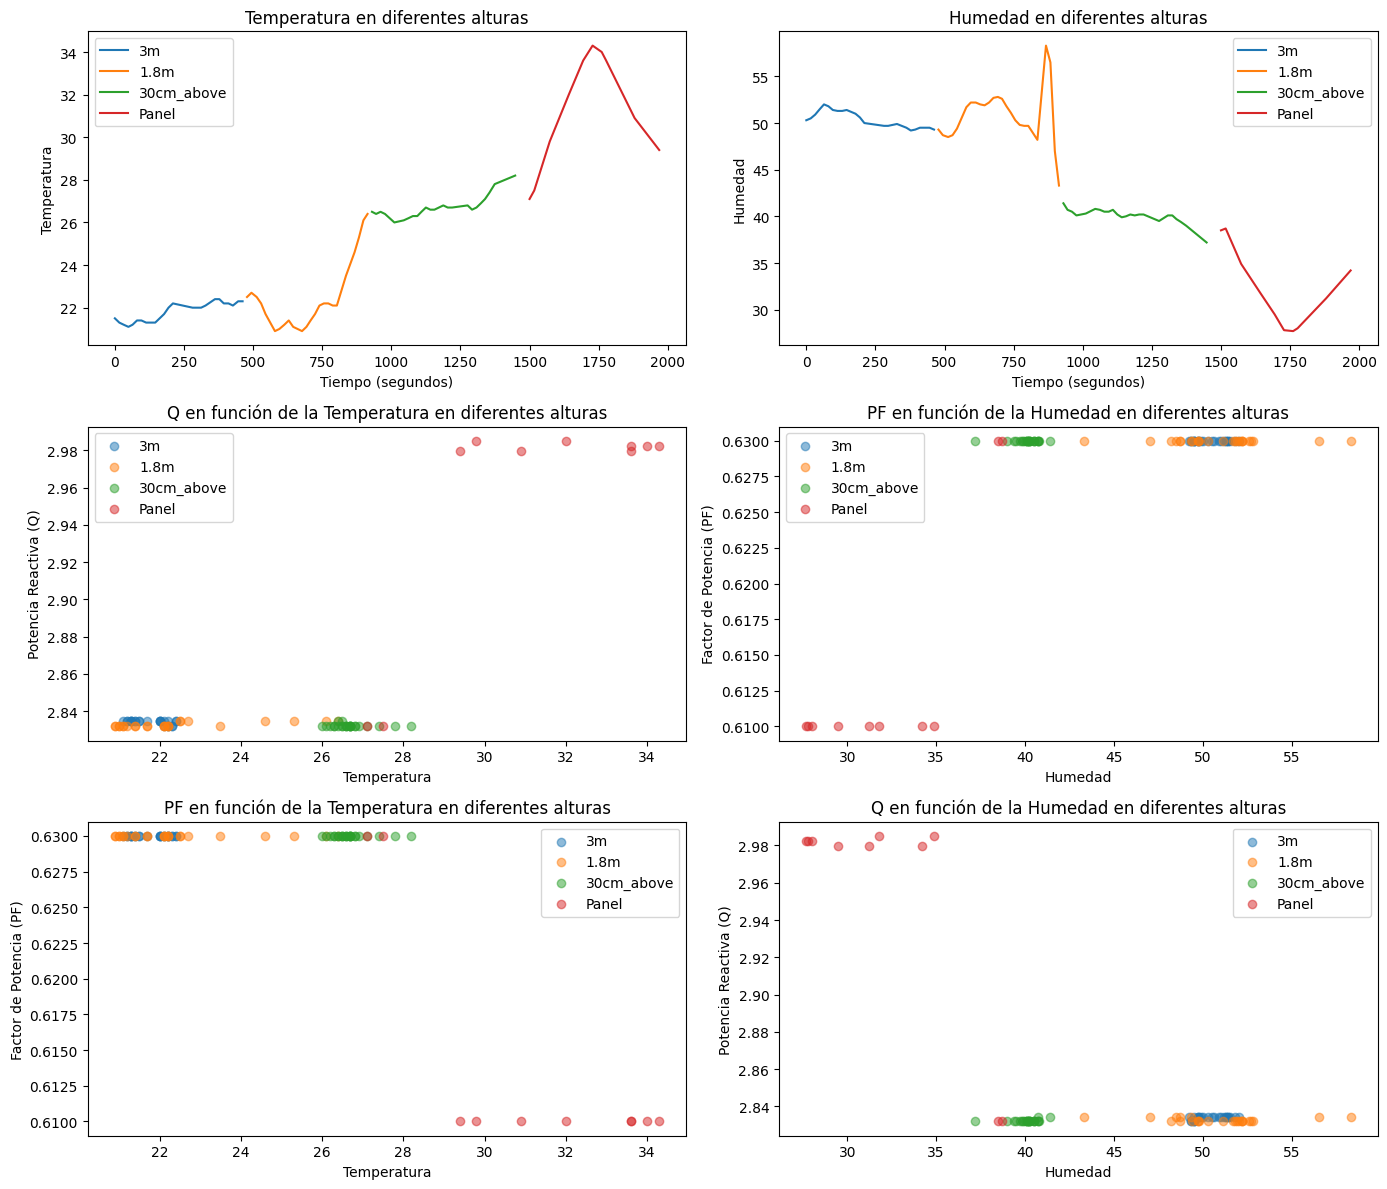

In [64]:
import matplotlib.pyplot as plt

# Crear una figura para las gráficas
plt.figure(figsize=(14, 12))

# Graficar la temperatura para cada altura con el orden correcto y datos limpios
plt.subplot(3, 2, 1)
for key, df in height_data_corrected.items():
    plt.plot(df['time_in_seconds'], df['temperature'], label=key)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Temperatura')
plt.title('Temperatura en diferentes alturas')
plt.legend()

# Graficar la humedad para cada altura con el orden correcto y datos limpios
plt.subplot(3, 2, 2)
for key, df in height_data_corrected.items():
    plt.plot(df['time_in_seconds'], df['humidity'], label=key)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Humedad')
plt.title('Humedad en diferentes alturas')
plt.legend()

# Graficar Q en función de la temperatura para cada altura con el orden correcto y datos limpios
plt.subplot(3, 2, 3)
for key, df in height_data_corrected.items():
    plt.scatter(df['temperature'], df['q'], label=key, alpha=0.5)
plt.xlabel('Temperatura')
plt.ylabel('Potencia Reactiva (Q)')
plt.title('Q en función de la Temperatura en diferentes alturas')
plt.legend()

# Graficar PF en función de la humedad para cada altura con el orden correcto y datos limpios
plt.subplot(3, 2, 4)
for key, df in height_data_corrected.items():
    plt.scatter(df['humidity'], df['pf'], label=key, alpha=0.5)
plt.xlabel('Humedad')
plt.ylabel('Factor de Potencia (PF)')
plt.title('PF en función de la Humedad en diferentes alturas')
plt.legend()

# Graficar PF en función de la temperatura para cada altura con el orden correcto y datos limpios
plt.subplot(3, 2, 5)
for key, df in height_data_corrected.items():
    plt.scatter(df['temperature'], df['pf'], label=key, alpha=0.5)
plt.xlabel('Temperatura')
plt.ylabel('Factor de Potencia (PF)')
plt.title('PF en función de la Temperatura en diferentes alturas')
plt.legend()

# Graficar Q en función de la humedad para cada altura con el orden correcto y datos limpios
plt.subplot(3, 2, 6)
for key, df in height_data_corrected.items():
    plt.scatter(df['humidity'], df['q'], label=key, alpha=0.5)
plt.xlabel('Humedad')
plt.ylabel('Potencia Reactiva (Q)')
plt.title('Q en función de la Humedad en diferentes alturas')
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\juanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\juanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


height         0
temperature    1
humidity       0
radiation      0
voltaje        0
corriente      0
potencia       0
energia        0
frecuencia     0
dtype: int64
height         0
temperature    0
humidity       0
radiation      0
voltaje        0
corriente      0
potencia       0
energia        0
frecuencia     0
dtype: int64
     height  temperature   humidity   radiation     voltaje  corriente   
0  0.000000    29.476768  45.350588  184.494118  110.551765   0.033094  \
1  0.030303    29.476768  45.350588  184.494118  110.551765   0.033094   
2  0.060606    29.153535  45.350588  184.494118  110.551765   0.033094   
3  0.090909    28.830303  45.350588  184.494118  110.551765   0.033094   
4  0.121212    28.507071  45.350588  184.494118  110.551765   0.033094   

   potencia   energia  frecuencia  
0       2.3  0.032506   59.802353  
1       2.3  0.032506   59.802353  
2       2.3  0.032506   59.802353  
3       2.3  0.032506   59.802353  
4       2.3  0.032506   59.802353  
tempera

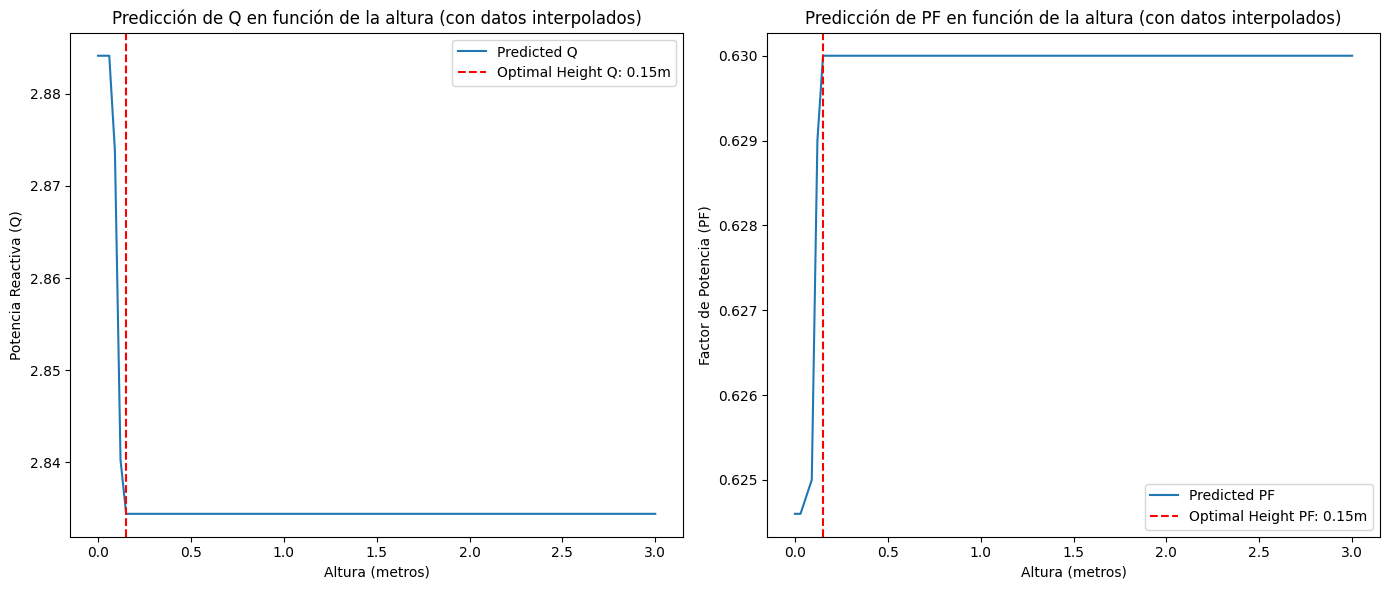

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import interp1d

# Filtrar y preparar los datos originales para la interpolación
df_heights = combined_df_cleaned[['height', 'temperature']].drop_duplicates().sort_values('height')

# Interpolación de la temperatura en función de la altura
f_interp = interp1d(df_heights['height'], df_heights['temperature'], kind='linear', fill_value='extrapolate')

# Generar alturas adicionales para la interpolación
new_heights = np.linspace(0, 3, 100)  # Desde 0m hasta 3m
new_temperatures = f_interp(new_heights)

# Crear un nuevo DataFrame con datos interpolados
interpolated_df = pd.DataFrame({'height': new_heights, 'temperature': new_temperatures})

# Aumentar el resto de las características manteniendo los valores promedio
other_features = combined_df_cleaned[['humidity', 'radiation', 'voltaje', 'corriente', 'potencia', 'energia', 'frecuencia']].mean()
for feature in other_features.index:
    interpolated_df[feature] = other_features[feature]

# Verificar si hay NaNs en los datos
print(interpolated_df.isna().sum())

# Eliminar o imputar NaNs si existen
interpolated_df.fillna(method='ffill', inplace=True)  # Forward fill para imputar NaNs
interpolated_df.fillna(method='bfill', inplace=True)  # Backward fill para imputar NaNs

# Verificar nuevamente si hay NaNs en los datos
print(interpolated_df.isna().sum())
print(interpolated_df.head())  # Mostrar las primeras filas para verificar

# Preparar los datos para el modelo
features = ['temperature', 'humidity', 'radiation', 'voltaje', 'corriente', 'potencia', 'energia', 'frecuencia', 'height']
X = combined_df_cleaned[features]
y_q = combined_df_cleaned['q']
y_pf = combined_df_cleaned['pf']

# Función para entrenar el modelo y evaluar el desempeño
def train_and_evaluate(model, X, y):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return model, mse, r2

# Entrenar y evaluar Random Forest para Q usando los datos originales
rf_model_q, rf_mse_q, rf_r2_q = train_and_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X, y_q)
# Entrenar y evaluar Random Forest para PF usando los datos originales
rf_model_pf, rf_mse_pf, rf_r2_pf = train_and_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X, y_pf)

# Asegurarnos de que las características en X_interpolated sean las mismas que en X
X_interpolated = interpolated_df[features]

# Verificar si hay NaNs en X_interpolated
print(X_interpolated.isna().sum())

# Eliminar o imputar NaNs si existen
X_interpolated.fillna(method='ffill', inplace=True)  # Forward fill para imputar NaNs
X_interpolated.fillna(method='bfill', inplace=True)  # Backward fill para imputar NaNs

# Predecir Q y PF para el rango de alturas con datos interpolados
interpolated_df['predicted_q'] = rf_model_q.predict(X_interpolated)
interpolated_df['predicted_pf'] = rf_model_pf.predict(X_interpolated)

# Encontrar la altura óptima
optimal_height_q = interpolated_df.loc[interpolated_df['predicted_q'].idxmin()]['height']
optimal_height_pf = interpolated_df.loc[interpolated_df['predicted_pf'].idxmax()]['height']

print(f"Altura mínima con la potencia reactiva más baja (Q): {optimal_height_q:.2f} metros")
print(f"Altura mínima con el factor de potencia más alto (PF): {optimal_height_pf:.2f} metros")

# Visualizar las predicciones
plt.figure(figsize=(14, 6))

# Gráfica de predicción de Q
plt.subplot(1, 2, 1)
plt.plot(interpolated_df['height'], interpolated_df['predicted_q'], label='Predicted Q')
plt.axvline(x=optimal_height_q, color='r', linestyle='--', label=f'Optimal Height Q: {optimal_height_q:.2f}m')
plt.xlabel('Altura (metros)')
plt.ylabel('Potencia Reactiva (Q)')
plt.title('Predicción de Q en función de la altura (con datos interpolados)')
plt.legend()

# Gráfica de predicción de PF
plt.subplot(1, 2, 2)
plt.plot(interpolated_df['height'], interpolated_df['predicted_pf'], label='Predicted PF')
plt.axvline(x=optimal_height_pf, color='r', linestyle='--', label=f'Optimal Height PF: {optimal_height_pf:.2f}m')
plt.xlabel('Altura (metros)')
plt.ylabel('Factor de Potencia (PF)')
plt.title('Predicción de PF en función de la altura (con datos interpolados)')
plt.legend()

plt.tight_layout()
plt.show()
